In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopy.distance
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import requests
from urllib.request import Request, urlopen
from urllib.parse import urlparse
import bs4
from pyexcel_ods import get_data
import datetime as dt
from datetime import datetime
import copy
from matplotlib.ticker import PercentFormatter

#s
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

### Packages to install: # hashtag to be removed if package not already installed on local computer 

In [2]:
#pip install empiricaldist

In [3]:
#pip install selenium

In [4]:
#pip install xlrd

In [5]:
#pip install xlwt

In [6]:
#pip install odfpy

In [7]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install imblearn --user

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [10]:
 pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [11]:
from empiricaldist import Pmf
#import xlrd
#from selenium import webdriver
#import xlwt
import plotly.express as px

In [12]:
# Original Datasets
data_path_2016 = r'C:\Users\obrienjo\Documents\GitHub\UCD-Specialist_project\dft-road-casualty-statistics-accident-2016.csv'
data_path_2017 = r'C:\Users\obrienjo\Documents\GitHub\UCD-Specialist_project\dft-road-casualty-statistics-accident-2017.csv'
data_path_2018 = r'C:\Users\obrienjo\Documents\GitHub\UCD-Specialist_project\dft-road-casualty-statistics-accident-2018.csv'
data_path_2019 = r'C:\Users\obrienjo\Documents\GitHub\UCD-Specialist_project\dft-road-casualty-statistics-accident-2019.csv'
data_path_2020 = r'C:\Users\obrienjo\Documents\GitHub\UCD-Specialist_project\dft-road-casualty-statistics-accident-2020.csv'
data_path_vehicle = r'C:\Users\obrienjo\Documents\GitHub\UCD-Specialist_project\dft-road-casualty-statistics-vehicle-last-5-years.csv'
data_path_dataset_guide = r'C:\Users\obrienjo\Documents\GitHub\UCD-Specialist_project\Road-Safety-Open-Dataset-Data-Guide.xlsx' 
data_path_car_numbers = r'C:\Users\obrienjo\Documents\GitHub\UCD-Specialist_project\car_data.ods' 

In [13]:
# Creating dataframes

df_2016 = pd.read_csv(data_path_2016, low_memory=False)
df_2017 = pd.read_csv(data_path_2017, low_memory=False)
df_2018 = pd.read_csv(data_path_2018, low_memory=False)
df_2019 = pd.read_csv(data_path_2019, low_memory=False)
df_2020 = pd.read_csv(data_path_2020, low_memory=False)
df_vehicle_incidents = pd.read_csv(data_path_vehicle, low_memory=False) # car accidents by vehicle type
df_guide = pd.read_excel(data_path_dataset_guide)


In [14]:
df_vehicle_incidents.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2016010000005,2016,010000005,1,8,0,6,3,7,0,...,1,1,51,8,-1,-1,-1,-1,3,1
1,2016010000005,2016,010000005,2,2,0,18,7,3,0,...,6,1,23,5,124,1,4,-1,4,1
2,2016010000006,2016,010000006,1,9,0,18,5,1,0,...,6,2,36,7,1461,2,1,-1,10,1
3,2016010000008,2016,010000008,1,9,0,18,1,8,0,...,6,1,24,5,1390,1,5,-1,8,1
4,2016010000016,2016,010000016,1,11,0,18,5,1,0,...,1,1,55,8,6692,2,7,-1,9,1


In [15]:
df_vehicle_incidents.shape

(1101591, 27)

In [16]:
df_vehicle_incidents.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type'],
      dtype='object')

In [17]:
### Import a dataframe of total number of registered cars by make and model for Year 2019

In [18]:
url =  r'https://www.gov.uk/government/statistical-data-sets/vehicle-licensing-statistics-data-files' 
html = requests.get(url)
soup = bs4.BeautifulSoup(html.text, "html.parser") 
#i = 0
for link in soup.find_all('a', href=True):
    href = link['href']
    if any(href.endswith(x) for x in ['df_VEH0220.csv']):
        print(href)
        car_register_df = pd.read_csv(href, encoding='windows-1254')

car_register_df


https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1077525/df_VEH0220.csv


,BodyType,Make,GenModel,Model,Fuel,EngineSizeSimple,EngineSizeDesc,Licensed,SORN
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,1400,1301cc to 1400cc,16,3
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,1400,1301cc to 1400cc,26,3
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,1400,1301cc to 1400cc,999,35
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,1400,1301cc to 1400cc,651,19
4,Cars,ABARTH,ABARTH 124,124 SPIDER SCORPIONE MULTIAIR,Petrol,1400,1301cc to 1400cc,64,0
...,...,...,...,...,...,...,...,...,...
175321,Motorcycles,ZONTES,ZONTES ZT,ZT 125-5A MONSTER,Petrol,125,51cc to 125cc,92,192
175322,Motorcycles,ZONTES,ZONTES ZT,ZT 125-8A PANTHER,Petrol,125,51cc to 125cc,88,215
175323,Motorcycles,ZONTES,ZONTES ZT,ZT 125-G1,Petrol,125,51cc to 125cc,255,3
175324,Motorcycles,ZONTES,ZONTES ZT,ZT 125-U,Petrol,125,51cc to 125cc,215,2


In [19]:
#regex = re.findall(r')
#jcb = car_model_df[car_model_df['Make'] == 'kawasaki']

In [20]:
print(car_register_df['Licensed'].isna().sum())
car_register_df.info()
car_register_df.shape

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175326 entries, 0 to 175325
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   BodyType          175326 non-null  object
 1   Make              175326 non-null  object
 2   GenModel          175326 non-null  object
 3   Model             175325 non-null  object
 4   Fuel              175326 non-null  object
 5   EngineSizeSimple  175326 non-null  object
 6   EngineSizeDesc    175326 non-null  object
 7   Licensed          175326 non-null  int64 
 8   SORN              175326 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 12.0+ MB


(175326, 9)

In [21]:
car_register_df['Make'] = car_register_df['Make'].str.lower()
car_register_df['make_short'] = car_register_df['Make'].str.extract(r'(\w+)')

In [22]:
car_register_grouped = car_register_df.groupby('make_short')['Licensed'].sum().reset_index(name='Total')

In [23]:
print(type(car_register_grouped))
car_register_grouped.head()

<class 'pandas.core.frame.DataFrame'>


,make_short,Total
0,abarth,28070
1,ac,406
2,access,90
3,acura,36
4,adly,46


In [24]:
car_list = []
for i in car_register_grouped['make_short']:
    car_list.append(i)
#car_list

In [25]:
#proportion of cars registered
total_cars = car_register_grouped['Total'].sum()
car_register_grouped['Proportion of total cars'] = car_register_grouped['Total']/total_cars*100
car_register_grouped['make_short'] = car_register_grouped['make_short'].str.lower()
print(car_register_grouped['make_short'].head(5))

0    abarth
1        ac
2    access
3     acura
4      adly
Name: make_short, dtype: object


In [26]:
#chcek number of NaN in each dataset

#print(df_2016.isna().sum())
#print(df_2017.isna().sum())
#print(df_2018.isna().sum())
print(df_2019.isna().sum())
#print(df_2020.isna().sum())


accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          28
location_northing_osgr                         28
longitude                                      28
latitude                                       28
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [27]:
print(df_vehicle_incidents['accident_year'].unique()) # confirm al years in range in df

[2016 2017 2018 2019 2020]


In [28]:
df_vehicle_incidents['generic_make_model'] = df_vehicle_incidents['generic_make_model'].astype(str)
df_vehicle_2019 = df_vehicle_incidents.loc[df_vehicle_incidents['accident_year'] == 2019]

In [29]:
df_vehicle_2019.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
717835,2019010128300,2019,010128300,1,9,0,99,9,9,99,...,6,1,58,9,-1,-1,-1,-1,2,1
717836,2019010128300,2019,010128300,2,9,0,99,9,9,99,...,6,3,-1,-1,-1,-1,-1,-1,2,1
717837,2019010152270,2019,010152270,1,9,0,18,9,9,99,...,6,2,24,5,-1,-1,-1,-1,3,1
717838,2019010152270,2019,010152270,2,9,0,18,9,9,99,...,6,3,-1,-1,-1,-1,-1,-1,6,1
717839,2019010155191,2019,010155191,1,9,0,3,5,1,0,...,6,1,45,7,-1,-1,-1,-1,4,1


In [30]:
df_vehicle_2019.isna().sum()
#df_vehicle_2019.shape

accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_decile                   0
driver_home_

In [31]:
print(df_vehicle_2019['generic_make_model'])

# remove any models where the make is -1 which is a classification as data missing
df_vehicle_2019 = copy.deepcopy(df_vehicle_incidents[df_vehicle_incidents['generic_make_model'] != -1])
print(df_vehicle_2019['generic_make_model'])
# Using regex to extract first name of car make to match with accident stats
df_vehicle_2019['make'] = df_vehicle_2019['generic_make_model'].str.extract(r'(\w+\s)')
df_vehicle_2019['make'] = df_vehicle_2019['make'].str.lower()
grouped_accident_by_car = df_vehicle_2019.groupby('make').agg({'accident_year':'count','age_of_driver':np.mean}).reset_index().rename(columns = {'accident_year':'Total incidents','age_of_driver':'Average age of driver'})#(name = ['total', 'avg'])#name=['Total','avg_age'])#.sort_values(ascending = False)
#sorted_model = pd.DataFrame(linei_slice.groupby([ 'Weeknumber Due off Shipping']).agg({'size_CO_B':np.sum,'alt_size_CO_B':np.sum,'Extra_Bulk_CO':np.sum,'Extra_WIP_CO':np.sum, 'Alt_Bulk_CO':np.sum, 'Alt_WIP_CO':np.sum, 'Tube_label_CO':np.sum}))#.header = 'Weeknumber Due off Shipping')

717835    -1
717836    -1
717837    -1
717838    -1
717839    -1
          ..
934211    -1
934212    -1
934213    -1
934214    -1
934215    -1
Name: generic_make_model, Length: 216381, dtype: object
0                          -1
1                          -1
2                          -1
3                          -1
4                          -1
                  ...        
1101586               AUDI A5
1101587    KTM 1290 SUPERDUKE
1101588                BMW X3
1101589                    -1
1101590            FORD FOCUS
Name: generic_make_model, Length: 1101591, dtype: object


In [32]:
grouped_accident_by_car

,make,Total incidents,Average age of driver
0,abarth,63,31.793651
1,ajs,11,41.727273
2,alexander,752,43.808511
3,alfa,192,34.067708
4,aprilia,65,28.861538
...,...,...,...
86,volkswagen,9790,33.464658
87,volvo,1999,43.181591
88,wrightbus,264,43.712121
89,yamaha,2345,30.773987


In [33]:
type(grouped_accident_by_car)

pandas.core.frame.DataFrame

In [34]:
grouped_accident_by_car['make'] = grouped_accident_by_car['make'].str.lower().str.strip()
    
print(grouped_accident_by_car['make'])
#check no white space around string
print(len(grouped_accident_by_car['make'][1]))

0         abarth
1            ajs
2      alexander
3           alfa
4        aprilia
         ...    
86    volkswagen
87         volvo
88     wrightbus
89        yamaha
90        zontes
Name: make, Length: 91, dtype: object
3


In [35]:

accident_vs_car = grouped_accident_by_car.merge(car_register_grouped, how ='left', left_on = 'make', right_on = 'make_short', suffixes=('_car accidents','_total cars on road'))
accident_vs_car.head(500)

,make,Total incidents,Average age of driver,make_short,Total,Proportion of total cars
0,abarth,63,31.793651,abarth,28070.0,0.069696
1,ajs,11,41.727273,ajs,9107.0,0.022612
2,alexander,752,43.808511,alexander,15565.0,0.038647
3,alfa,192,34.067708,alfa,81243.0,0.201722
4,aprilia,65,28.861538,aprilia,14805.0,0.036760
...,...,...,...,...,...,...
86,volkswagen,9790,33.464658,volkswagen,3496057.0,8.680510
87,volvo,1999,43.181591,volvo,712233.0,1.768434
88,wrightbus,264,43.712121,wrightbus,4097.0,0.010173
89,yamaha,2345,30.773987,yamaha,173517.0,0.430833


In [36]:
accident_vs_car['Accident to car proportion'] = accident_vs_car['Total incidents']/accident_vs_car['Total']*100
accident_vs_car = accident_vs_car.sort_values('Accident to car proportion', ascending =False)
accident_vs_car['Cumperc'] = accident_vs_car['Accident to car proportion'].cumsum()/accident_vs_car['Accident to car proportion'].sum()*100
accident_vs_car['Accident to total proportion'] = accident_vs_car['Total']/np.sum(accident_vs_car['Total'])*100

In [37]:
accident_vs_car = accident_vs_car.sort_values('Accident to car proportion', ascending =False)
accident_vs_car


,make,Total incidents,Average age of driver,make_short,Total,Proportion of total cars,Accident to car proportion,Cumperc,Accident to total proportion
88,wrightbus,264,43.712121,wrightbus,4097.0,0.010173,6.443739,11.782422,0.010427
2,alexander,752,43.808511,alexander,15565.0,0.038647,4.831352,20.616583,0.039612
66,qingqi,37,21.432432,qingqi,1291.0,0.003205,2.865995,25.857076,0.003285
82,um,11,30.181818,um,401.0,0.000996,2.743142,30.872930,0.001021
61,optare,95,47.557895,optare,3989.0,0.009904,2.381549,35.227609,0.010152
...,...,...,...,...,...,...,...,...,...
7,bentley,14,28.714286,bentley,25454.0,0.063201,0.055001,99.800816,0.064778
43,lambretta,13,47.692308,lambretta,24130.0,0.059913,0.053875,99.899327,0.061409
52,massey,32,42.562500,massey,81223.0,0.201672,0.039398,99.971366,0.206706
35,jcb,11,36.090909,jcb,70243.0,0.174409,0.015660,100.000000,0.178763


In [38]:
accident_vs_car['Total'].sum()

39294001.0

In [39]:
accident_vs_car

,make,Total incidents,Average age of driver,make_short,Total,Proportion of total cars,Accident to car proportion,Cumperc,Accident to total proportion
88,wrightbus,264,43.712121,wrightbus,4097.0,0.010173,6.443739,11.782422,0.010427
2,alexander,752,43.808511,alexander,15565.0,0.038647,4.831352,20.616583,0.039612
66,qingqi,37,21.432432,qingqi,1291.0,0.003205,2.865995,25.857076,0.003285
82,um,11,30.181818,um,401.0,0.000996,2.743142,30.872930,0.001021
61,optare,95,47.557895,optare,3989.0,0.009904,2.381549,35.227609,0.010152
...,...,...,...,...,...,...,...,...,...
7,bentley,14,28.714286,bentley,25454.0,0.063201,0.055001,99.800816,0.064778
43,lambretta,13,47.692308,lambretta,24130.0,0.059913,0.053875,99.899327,0.061409
52,massey,32,42.562500,massey,81223.0,0.201672,0.039398,99.971366,0.206706
35,jcb,11,36.090909,jcb,70243.0,0.174409,0.015660,100.000000,0.178763


In [40]:
print(str(len(accident_vs_car[accident_vs_car['Cumperc'] <= 80])) + ' (' + str(round((len(accident_vs_car[accident_vs_car['Cumperc'] <= 80])/len(accident_vs_car)),2)*100) + '%) of car makes out of ' + str(len(accident_vs_car)) + ' account for 80% of incidents.')

33 (36.0%) of car makes out of 91 account for 80% of incidents.


In [41]:
for i in range(len(accident_vs_car['make'])):
    print(accident_vs_car['make'][i].title() + ' accident %: ' + str(round(accident_vs_car['Accident to car proportion'][i],2)))

Abarth accident %: 0.22
Ajs accident %: 0.12
Alexander accident %: 4.83
Alfa accident %: 0.24
Aprilia accident %: 0.44
Audi accident %: 0.3
Benelli accident %: 0.67
Bentley accident %: 0.06
Bmw accident %: 0.37
Byd accident %: 1.87
Case accident %: 0.09
Chevrolet accident %: 0.34
Chrysler accident %: 0.23
Citroen accident %: 0.25
Claas accident %: 0.12
Dacia accident %: 0.17
Daewoo accident %: 0.25
Daf accident %: 0.55
Daihatsu accident %: 0.19
Davidson accident %: nan
Dennis accident %: 0.4
Dodge accident %: 0.18
Ds accident %: 0.22
Ducati accident %: 0.07
Fendt accident %: 0.22
Fiat accident %: 0.23
Ford accident %: 0.29
Gilera accident %: 1.99
Honda accident %: 0.52
Hyosung accident %: 1.25
Hyundai accident %: 0.22
Infiniti accident %: 0.15
Isuzu accident %: 0.06
Iveco accident %: 0.29
Jaguar accident %: 0.2
Jcb accident %: 0.02
Jeep accident %: 0.22
John accident %: 0.07
Kawasaki accident %: 0.43
Keeway accident %: 0.92
Kia accident %: 0.21
Ktm accident %: 0.38
Kymco accident %: 0.

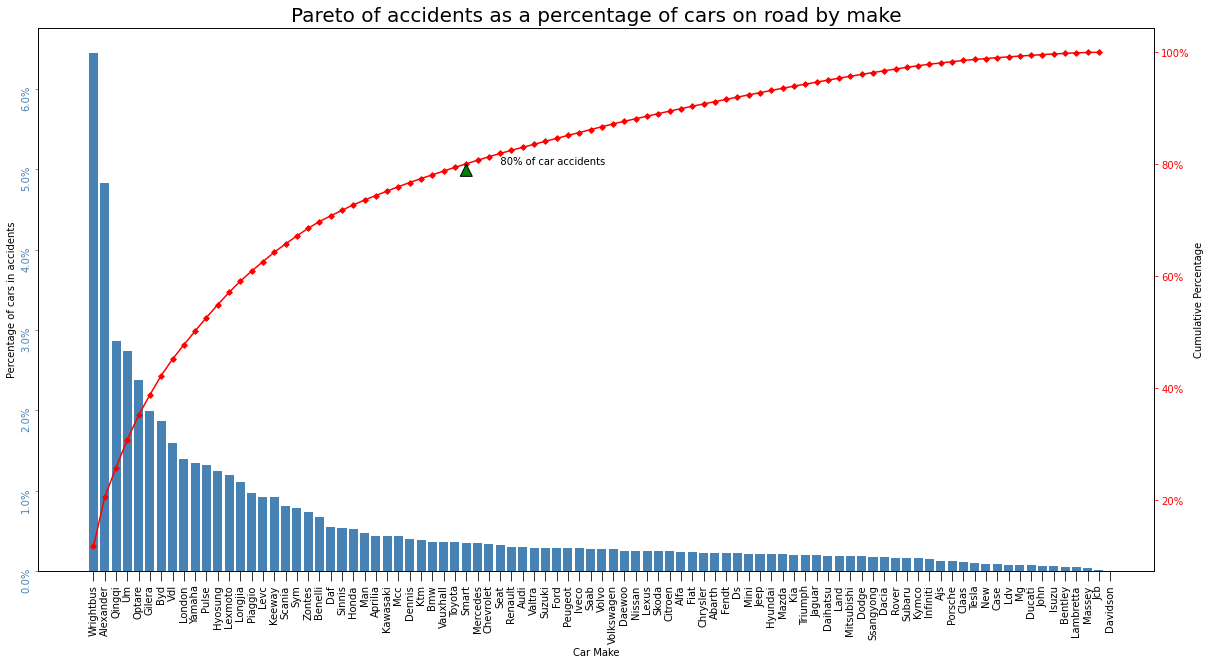

In [42]:
accident_vs_car.index =  accident_vs_car['make'].str.title()
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
color3 = 'green'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots(figsize=(20,10))

#fig = plt.figure(figsize =(6,4), dpi = 100)
#ax = plt.subplots()
ax.bar(accident_vs_car.index, accident_vs_car['Accident to car proportion'], color=color1)
#ax.bar(accident_vs_car.index, accident_vs_car['Accident to total proportion'], color=color3)
#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(accident_vs_car.index, accident_vs_car['Cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.yaxis.set_major_formatter(PercentFormatter())
#specify axis colors
ax.tick_params(axis='y', colors=color1, rotation = 90)
ax2.tick_params(axis='y', colors=color2)

ax.tick_params(axis='x', rotation=90, size = 10)
ax.set_xlabel('Car Make')
ax.set_title('Pareto of accidents as a percentage of cars on road by make', fontsize=20)
ax.set_ylabel('Percentage of cars in accidents')
ax2.set_ylabel('Cumulative Percentage')

ax2.annotate('           80% of car accidents', xy =(33, 80),
             xytext =(33, 80),
             arrowprops = dict(facecolor ='green',
                               shrink = 0),)
#display Pareto chart
plt.show()


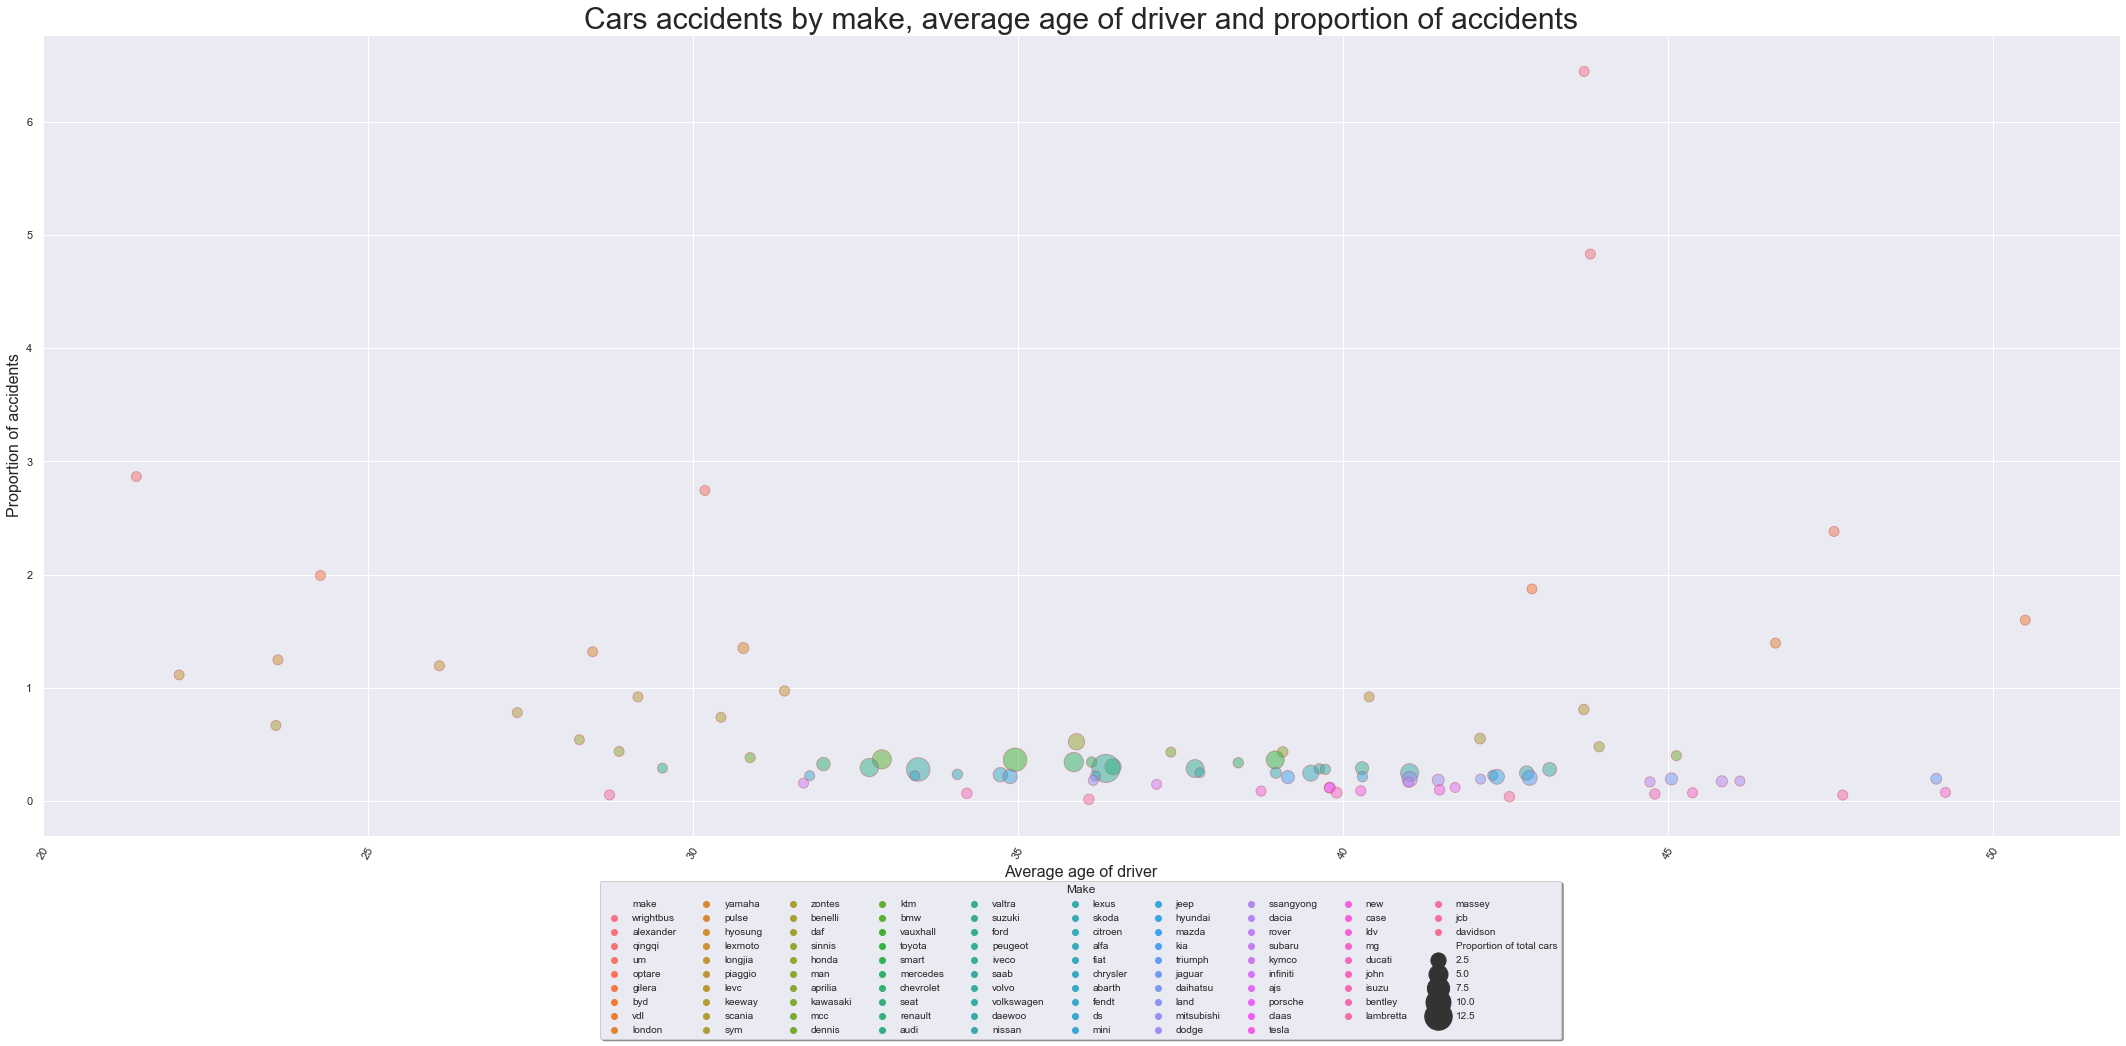

In [150]:

sns.scatterplot(data = accident_vs_car,  x = "Average age of driver",  y = "Accident to car proportion", hue = "make", size = "Proportion of total cars", sizes = (100, 800), edgecolor='r', alpha = .5).set_title("Cars accidents by make, average age of driver and proportion of accidents").set_size(30)
plt.xticks(rotation=60, ha='center')
#plt.legend(loc=0, prop={'size': 10},)

from matplotlib import rcParams

rcParams['figure.figsize'] = 30,15
rcParams.update({'font.size': 22})
plt.ylabel("Proportion of accidents", fontsize=16)
plt.xlabel("Average age of driver", fontsize=16)

plt.legend(loc = 'upper center', bbox_to_anchor =(0.5,-0.05), fancybox = True, shadow = True, title='Make', ncol = 10, prop={'size': 10}) #, mode = "expand"

plt.tight_layout()
plt.show()


In [44]:
accident_vs_car.columns

Index(['make', 'Total incidents', 'Average age of driver', 'make_short',
       'Total', 'Proportion of total cars', 'Accident to car proportion',
       'Cumperc', 'Accident to total proportion'],
      dtype='object')

In [45]:
# check sahpe of tables before concatenation
print('2016 data shape: ' + str(df_2016.shape))
print('2017 data shape: ' + str(df_2017.shape))
print('2018 data shape: ' + str(df_2018.shape))
print('2019 data shape: ' + str(df_2019.shape))
print('2020 data shape: ' + str(df_2020.shape))

2016 data shape: (136621, 36)
2017 data shape: (129982, 36)
2018 data shape: (122635, 36)
2019 data shape: (117536, 36)
2020 data shape: (91199, 36)


In [46]:
# Concat tables and check shape
data_tables = [df_2016, df_2017, df_2018, df_2019, df_2020]
uk_df = pd.concat(data_tables)
uk_df.shape

(597973, 36)

In [47]:
uk_df.isna().sum()

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          123
location_northing_osgr                         123
longitude                                      133
latitude                                       133
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [48]:
print(uk_df.shape)
print(df_vehicle_incidents.shape)

(597973, 36)
(1101591, 27)


In [49]:
# Drop NaN from full dataset and check shape
uk_df = uk_df.dropna()
uk_df.isna().sum()
uk_df.shape

(597803, 36)

In [50]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597803 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               597803 non-null  object 
 1   accident_year                                597803 non-null  int64  
 2   accident_reference                           597803 non-null  object 
 3   location_easting_osgr                        597803 non-null  float64
 4   location_northing_osgr                       597803 non-null  float64
 5   longitude                                    597803 non-null  float64
 6   latitude                                     597803 non-null  float64
 7   police_force                                 597803 non-null  int64  
 8   accident_severity                            597803 non-null  int64  
 9   number_of_vehicles                           597803 non-null

In [51]:
uk_df['date_time'] = pd.to_datetime(uk_df['date'] + ' ' +uk_df['time'])
uk_df[['time', 'date', 'date_time']].head(5)
uk_df['hour'] = uk_df['date_time'].dt.hour
uk_df['month'] = uk_df['date_time'].dt.month


In [52]:
uk_df['month_year'] = uk_df['date_time'].dt.strftime('%m/%Y')

In [53]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597803 entries, 0 to 91198
Data columns (total 40 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               597803 non-null  object        
 1   accident_year                                597803 non-null  int64         
 2   accident_reference                           597803 non-null  object        
 3   location_easting_osgr                        597803 non-null  float64       
 4   location_northing_osgr                       597803 non-null  float64       
 5   longitude                                    597803 non-null  float64       
 6   latitude                                     597803 non-null  float64       
 7   police_force                                 597803 non-null  int64         
 8   accident_severity                            597803 non-null  int

In [54]:
df_vehicle_incidents.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type'],
      dtype='object')

In [55]:
accident_andcar_df = uk_df.merge(df_vehicle_incidents, on = 'accident_reference', suffixes =('_uk','_veh'))
print(accident_andcar_df.shape)
accident_andcar_df.columns

(879462, 66)


Index(['accident_index_uk', 'accident_year_uk', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'date_time', 'hour',
       'month', 'month_year', 'accident_index_veh', 'accident_year_veh

In [56]:
def data_guide(field_name):
    """return a slice of a data frame to descibe the code used in dataset 
    Args:
        field_name (str): Name of field to investigate
        
    Yields:
        dataframe slice
    """
    data1 = df_guide[df_guide['field name']==field_name]
    return data1

In [57]:
week_day = data_guide('day_of_week')
print(week_day)

       table   field name code/format      label note
65  Accident  day_of_week           1     Sunday  NaN
66  Accident  day_of_week           2     Monday  NaN
67  Accident  day_of_week           3    Tuesday  NaN
68  Accident  day_of_week           4  Wednesday  NaN
69  Accident  day_of_week           5   Thursday  NaN
70  Accident  day_of_week           6     Friday  NaN
71  Accident  day_of_week           7   Saturday  NaN


In [58]:
week_day_key = list(week_day['code/format'])
week_day_name = list(week_day['label'])
week_key = {}
for i in range(len(week_day_key)):
    week_key[week_day_key[i]] = week_day_name[i]

print(week_key)

{1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}


In [59]:
severity = data_guide('accident_severity')

In [60]:
severity_list = list(severity['code/format'])
severity_name = list(severity['label'])
severity_key = {}
for i in range(len(severity_list)):
    severity_key[severity_list[i]] = severity_name[i]

print(severity_key)

{1: 'Fatal', 2: 'Serious', 3: 'Slight'}


In [61]:
#ECDF function
def ecdf(data):
    """ compute ECDF for a one-dimensional array of measurements"""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y


In [62]:
#map day name & severity to df
uk_df['day_of_week'] = uk_df['day_of_week'].map(week_key)
uk_df['accident_severity'] = uk_df['accident_severity'].map(severity_key)

             day_of_week
day_of_week             
Friday         16.352544
Monday         14.107658
Saturday       13.212547
Sunday         11.213728
Thursday       15.291325
Tuesday        14.783465
Wednesday      15.038733


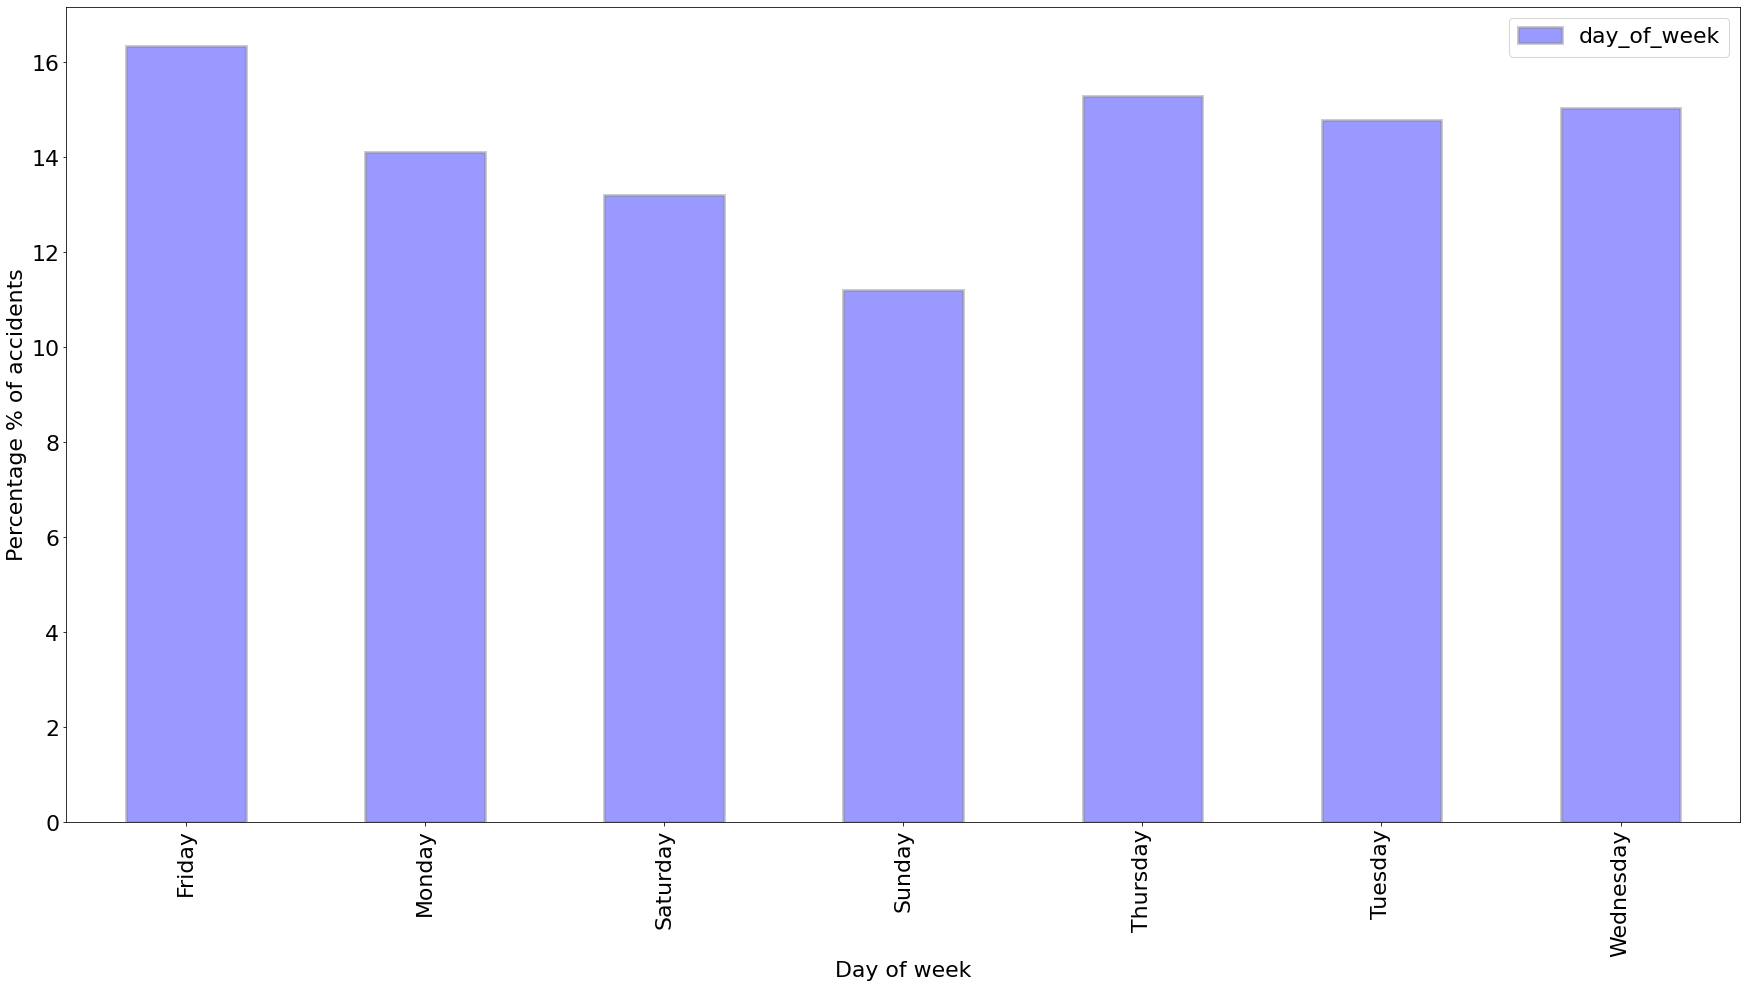

In [63]:
x = pd.DataFrame(uk_df.groupby('day_of_week')['day_of_week'].count()/len(uk_df['day_of_week'])*100)#.plot.barh()
x.plot(kind = 'bar',color = 'blue', edgecolor = 'grey',  alpha = 0.4, linewidth = 3, xlabel='Day of week', ylabel='Percentage % of accidents')

#plt.xticks(rotation=1)
#x = x.reset_index()
#_=sns.barplot(data=x,  color = 'blue', edgecolor = 'grey', alpha = 0.4, linewidth = 3)
print(x)
#_=plt.bar(alpha = 0.7, edgecolor = 'grey', linewidth = 3, height = x, x=week_day_name )

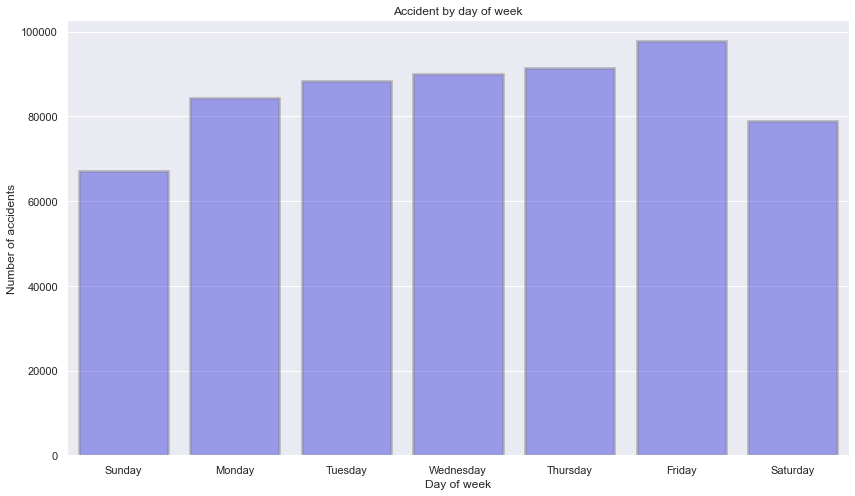

In [64]:
sns.set()
#plt.style.use('ggplot')
#labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
_=plt.figure(figsize=(14,8))
_=sns.countplot(x = uk_df.day_of_week, data=uk_df, order = week_day_name, color = 'blue', edgecolor = 'grey', alpha = 0.4, linewidth = 3)
#_=plt.hist(uk_df['day_of_week'], bins = 7, alpha = 0.7, edgecolor = 'grey', linewidth = 3)
_=plt.title('Accident by day of week')
_=plt.xlabel('Day of week')
_=plt.ylabel('Number of accidents')
plt.show()





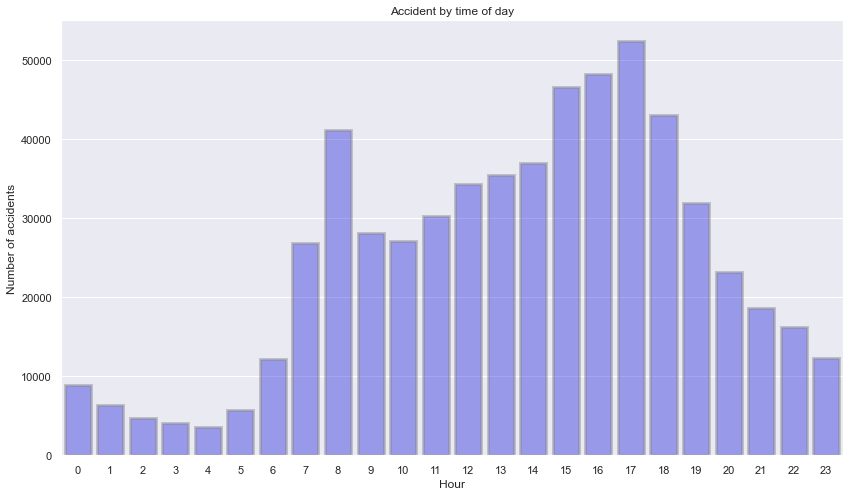

In [65]:
sns.set()
#plt.style.use('ggplot')
#labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
_=plt.figure(figsize=(14,8))
_=sns.countplot(x = uk_df.hour, data=uk_df, color = 'blue', edgecolor = 'grey', alpha = 0.4, linewidth = 3)
#_=plt.hist(uk_df['day_of_week'], bins = 7, alpha = 0.7, edgecolor = 'grey', linewidth = 3)
_=plt.title('Accident by time of day')
_=plt.xlabel('Hour')
_=plt.ylabel('Number of accidents')
plt.show()


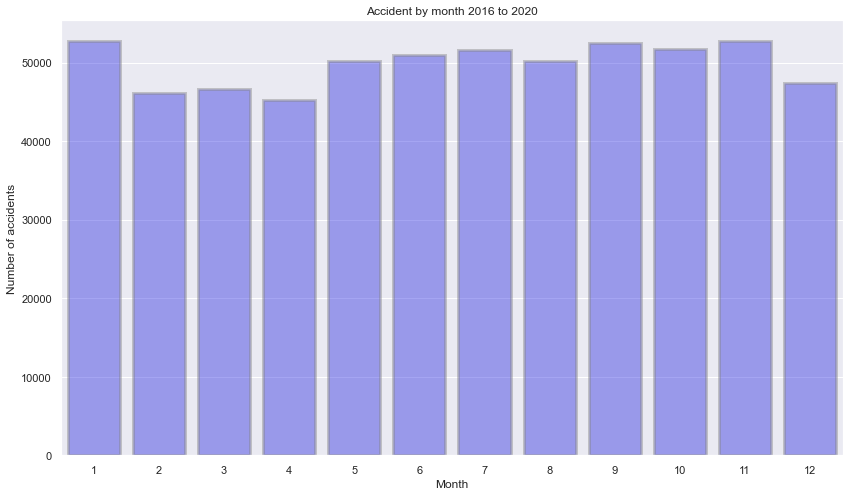

In [66]:
sns.set()
#plt.style.use('ggplot')
#labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
_=plt.figure(figsize=(14,8))
_=sns.countplot(x = uk_df.month, data=uk_df, color = 'blue', edgecolor = 'grey', alpha = 0.4, linewidth = 3)
#_=plt.hist(uk_df['day_of_week'], bins = 7, alpha = 0.7, edgecolor = 'grey', linewidth = 3)
_=plt.title('Accident by month 2016 to 2020')
_=plt.xlabel('Month')
_=plt.ylabel('Number of accidents')
plt.show()

In [67]:

month_year = list(uk_df.month_year.unique())
month_year = pd.to_datetime(month_year)
month_year = sorted(month_year)
month_year_b = []
for i in month_year:
    month_year_b.append(i.strftime('%m/%Y'))
    
print(month_year_b)

['01/2016', '02/2016', '03/2016', '04/2016', '05/2016', '06/2016', '07/2016', '08/2016', '09/2016', '10/2016', '11/2016', '12/2016', '01/2017', '02/2017', '03/2017', '04/2017', '05/2017', '06/2017', '07/2017', '08/2017', '09/2017', '10/2017', '11/2017', '12/2017', '01/2018', '02/2018', '03/2018', '04/2018', '05/2018', '06/2018', '07/2018', '08/2018', '09/2018', '10/2018', '11/2018', '12/2018', '01/2019', '02/2019', '03/2019', '04/2019', '05/2019', '06/2019', '07/2019', '08/2019', '09/2019', '10/2019', '11/2019', '12/2019', '01/2020', '02/2020', '03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020', '10/2020', '11/2020', '12/2020']


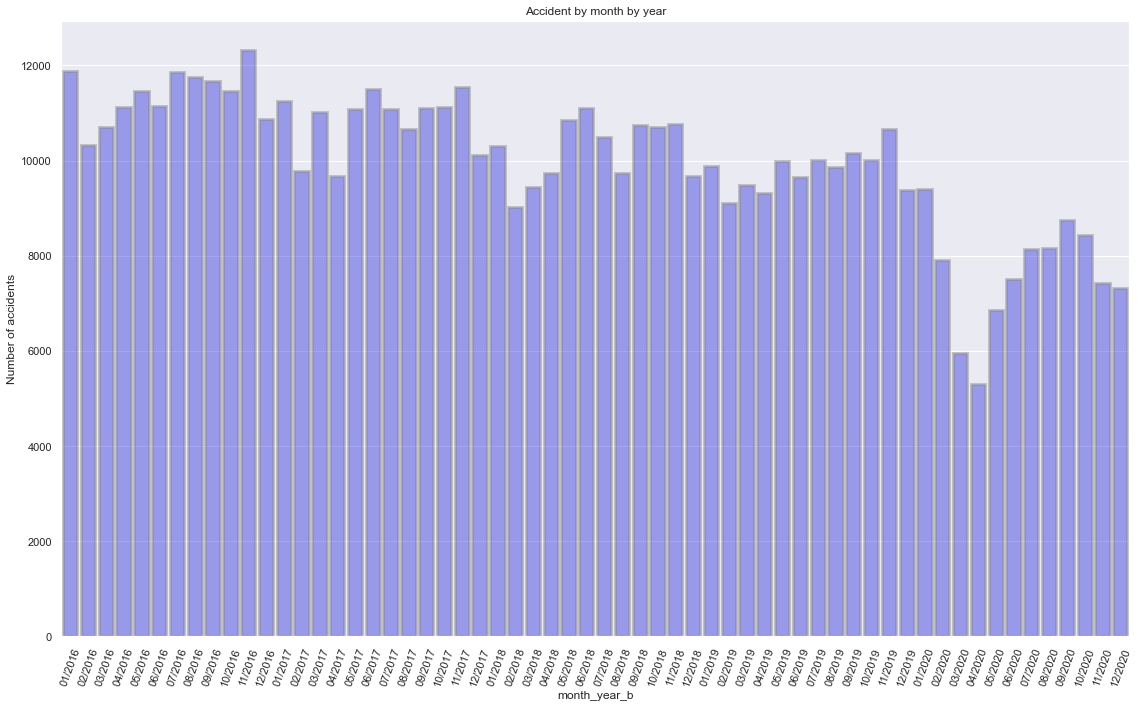

In [68]:
sns.set()
#plt.style.use('ggplot')
#labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
_=plt.figure(figsize=(16,10))
_=sns.countplot(x = uk_df.month_year, data=uk_df, order= month_year_b, color = 'blue', edgecolor = 'grey', alpha = 0.4, linewidth = 3)
_=plt.title('Accident by month by year')
_=plt.xlabel('month_year_b')
_=plt.ylabel('Number of accidents')
_=plt.xticks(rotation = 70)
_=plt.tight_layout()
plt.show()

In [69]:
## The impact of the restrictions are apparent in 2020 with asignificant drop in road accidents from March 2020, the start of restrictions.
## February for the past 5 years has consistantly had lower car accidents but this is more likely simply due to less calendar days in February

In [70]:
uk_df_16to19 = uk_df[uk_df['accident_year'] != 2020]

In [71]:
uk_df_16to19['accident_year'].unique()

array([2016, 2017, 2018, 2019], dtype=int64)

['01/2016', '02/2016', '03/2016', '04/2016', '05/2016', '06/2016', '07/2016', '08/2016', '09/2016', '10/2016', '11/2016', '12/2016', '01/2017', '02/2017', '03/2017', '04/2017', '05/2017', '06/2017', '07/2017', '08/2017', '09/2017', '10/2017', '11/2017', '12/2017', '01/2018', '02/2018', '03/2018', '04/2018', '05/2018', '06/2018', '07/2018', '08/2018', '09/2018', '10/2018', '11/2018', '12/2018', '01/2019', '02/2019', '03/2019', '04/2019', '05/2019', '06/2019', '07/2019', '08/2019', '09/2019', '10/2019', '11/2019', '12/2019']


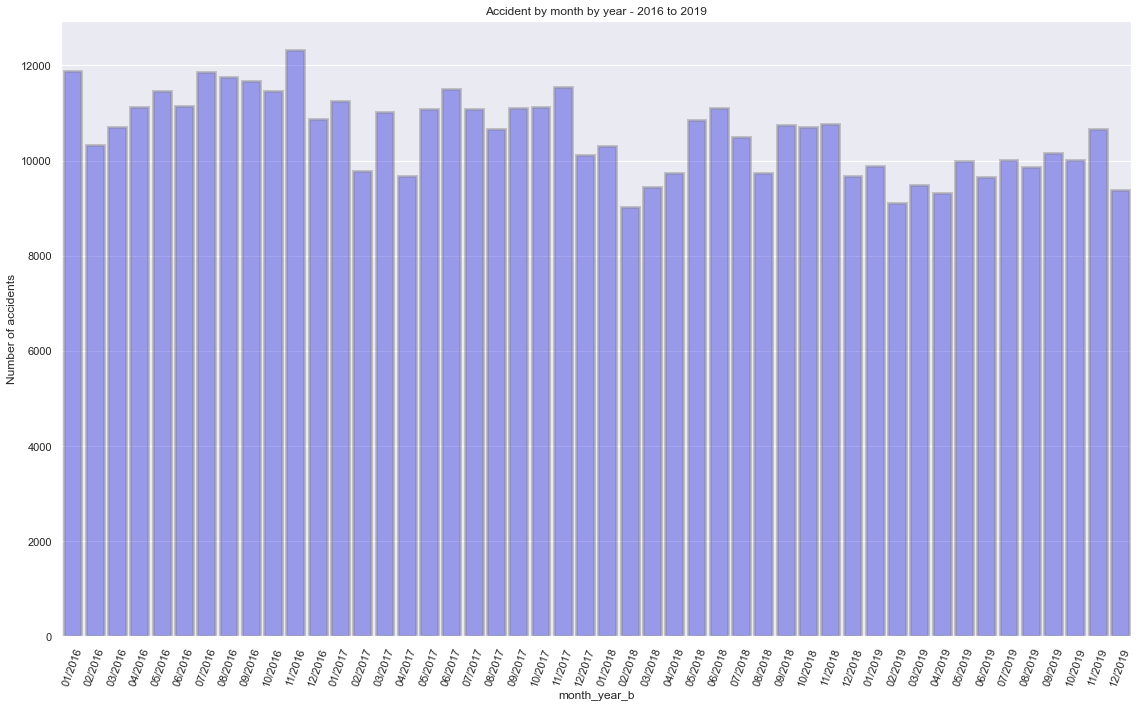

In [72]:
month_year = list(uk_df_16to19.month_year.unique())
month_year = pd.to_datetime(month_year)
month_year = sorted(month_year)
month_year_b = []
for i in month_year:
    month_year_b.append(i.strftime('%m/%Y'))
    
print(month_year_b)


sns.set()
#plt.style.use('ggplot')
#labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
_=plt.figure(figsize=(16,10))
_=sns.countplot(x = uk_df_16to19.month_year, data=uk_df, order= month_year_b, color = 'blue', edgecolor = 'grey', alpha = 0.4, linewidth = 3)
_=plt.title('Accident by month by year - 2016 to 2019')
_=plt.xlabel('month_year_b')
_=plt.ylabel('Number of accidents')
_=plt.xticks(rotation = 70)
_=plt.tight_layout()
plt.show()

In [73]:
## account for days in teh month and cross reference accidents by time of day to see if sunlight impacts

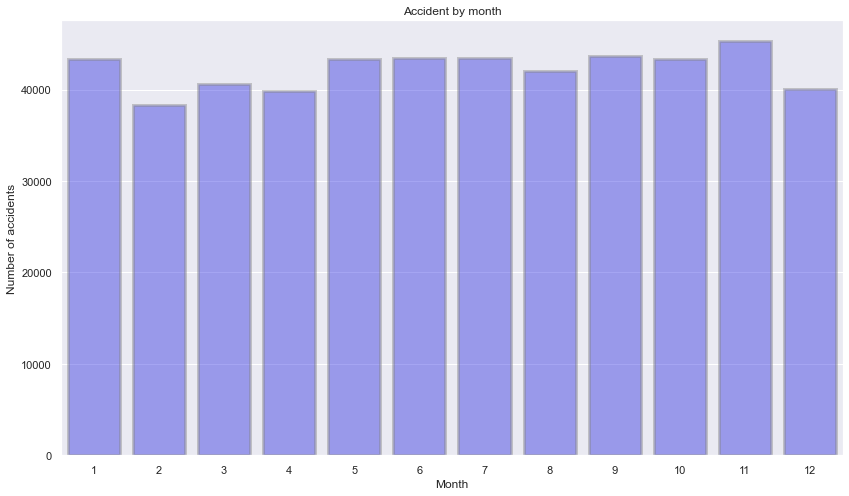

In [74]:
sns.set()
#plt.style.use('ggplot')
#labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
_=plt.figure(figsize=(14,8))
_=sns.countplot(x = uk_df_16to19.month, data=uk_df_16to19, color = 'blue', edgecolor = 'grey', alpha = 0.4, linewidth = 3)
#_=plt.hist(uk_df['day_of_week'], bins = 7, alpha = 0.7, edgecolor = 'grey', linewidth = 3)
_=plt.title('Accident by month')
_=plt.xlabel('Month')
_=plt.ylabel('Number of accidents')
plt.show()

In [75]:
uk_df_16to19_fatal = uk_df_16to19[uk_df_16to19['accident_severity'] == 'Fatal']

In [76]:
uk_df_16to19_fatal

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,date_time,hour,month,month_year
132,2.01601E+12,2016,10000240,544490.0,188140.0,0.083639,51.573564,1,Fatal,4,...,0,0,1,1,2,E01003645,2016-03-11 07:23:00,7,3,03/2016
313,2.01601E+12,2016,10000488,537880.0,181000.0,-0.014478,51.511057,1,Fatal,2,...,0,0,1,1,2,E01004257,2016-05-11 14:10:00,14,5,05/2016
963,2.01601E+12,2016,10001527,541240.0,190260.0,0.037625,51.593437,1,Fatal,1,...,0,0,1,1,2,E01003764,2016-11-14 09:02:00,9,11,11/2016
1230,2.01601E+12,2016,10002074,530190.0,179270.0,-0.125868,51.497333,1,Fatal,2,...,0,0,1,1,2,E01004733,2016-11-16 17:59:00,17,11,11/2016
1241,2.01601E+12,2016,10002094,527320.0,192310.0,-0.162473,51.615176,1,Fatal,2,...,0,0,1,1,2,E01000324,2016-11-17 17:48:00,17,11,11/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117451,2.01998E+12,2019,982104219,283956.0,557374.0,-3.811046,54.897583,98,Fatal,2,...,0,0,2,1,-1,-1,2019-05-23 21:30:00,21,5,05/2019
117478,2.01998E+12,2019,983107719,292895.0,577023.0,-3.679079,55.076072,98,Fatal,1,...,0,0,2,1,-1,-1,2019-06-04 13:35:00,13,6,06/2019
117521,2.01998E+12,2019,984105319,323083.0,573291.0,-3.205393,55.048145,98,Fatal,2,...,0,0,2,1,-1,-1,2019-02-05 06:10:00,6,2,02/2019
117523,2.01998E+12,2019,984105519,319488.0,574999.0,-3.262127,55.062919,98,Fatal,2,...,0,0,2,1,-1,-1,2019-01-05 21:05:00,21,1,01/2019


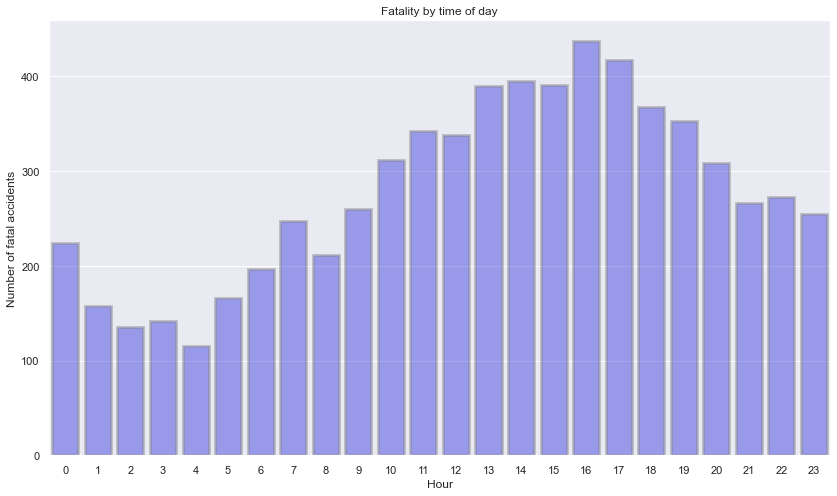

In [77]:
sns.set()
#plt.style.use('ggplot')
#labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
_=plt.figure(figsize=(14,8))
_=sns.countplot(x = uk_df_16to19_fatal.hour, data=uk_df_16to19_fatal, color = 'blue', edgecolor = 'grey', alpha = 0.4, linewidth = 3)
#_=plt.hist(uk_df['day_of_week'], bins = 7, alpha = 0.7, edgecolor = 'grey', linewidth = 3)
_=plt.title('Fatality by time of day')
_=plt.xlabel('Hour')
_=plt.ylabel('Number of fatal accidents')
plt.show()


In [78]:
accident_andcar_df.columns


Index(['accident_index_uk', 'accident_year_uk', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'date_time', 'hour',
       'month', 'month_year', 'accident_index_veh', 'accident_year_veh

In [79]:
accident_andcar_df

,accident_index_uk,accident_year_uk,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2016010X31538,2016,010X31538,548440.0,188580.0,0.140783,51.576492,1,3,2,...,6,2,26,6,-1,-1,-1,-1,-1,-1
1,2016010X31538,2016,010X31538,548440.0,188580.0,0.140783,51.576492,1,3,2,...,6,1,25,5,-1,-1,-1,-1,3,1
2,2016010X31762,2016,010X31762,553100.0,184840.0,0.206353,51.541644,1,3,2,...,6,2,18,4,-1,-1,-1,-1,4,1
3,2016010X31762,2016,010X31762,553100.0,184840.0,0.206353,51.541644,1,3,2,...,6,1,40,7,-1,-1,-1,-1,7,1
4,201601BS70001,2016,01BS70001,527670.0,179590.0,-0.162035,51.500783,1,2,1,...,1,1,31,6,4764,2,2,-1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879457,2.02099E+12,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
879458,2.02099E+12,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
879459,2.02099E+12,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
879460,2.02099E+12,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [80]:
engine_capacity = data_guide('engine_capacity_cc')
print(engine_capacity)
vehicle_type = data_guide('vehicle_type')
vehicle_type
driver_home_area_type =data_guide('driver_home_area_type')
driver_home_area_type
data_guide('first_point_of_impact')

        table          field name code/format                         label  \
1426  Vehicle  engine_capacity_cc         NaN                           NaN   
1427  Vehicle  engine_capacity_cc          -1  Data missing or out of range   

     note  
1426  NaN  
1427  NaN  


,table,field name,code/format,label,note
1389,Vehicle,first_point_of_impact,0,Did not impact,NaN
1390,Vehicle,first_point_of_impact,1,Front,NaN
1391,Vehicle,first_point_of_impact,2,Back,NaN
1392,Vehicle,first_point_of_impact,3,Offside,NaN
1393,Vehicle,first_point_of_impact,4,Nearside,NaN
1394,Vehicle,first_point_of_impact,9,unknown (self reported),NaN
1395,Vehicle,first_point_of_impact,-1,Data missing or out of range,NaN


predcit the severity of an accident with the following
vehicle_type, sex of driver, age of driver, engine capacity, age of vehicle, road_surface_conditions

In [81]:
fatal_accidents = accident_andcar_df[accident_andcar_df['accident_severity']==1]

In [82]:
fatal_accidents

,accident_index_uk,accident_year_uk,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
19750,201601TD00001,2016,01TD00001,539790.0,179240.0,0.012331,51.494773,1,1,1,...,1,2,43,7,4500,2,2,-1,2,1
19751,201601TD00002,2016,01TD00002,533210.0,178740.0,-0.082587,51.491867,1,1,1,...,6,1,53,8,125,1,9,-1,4,1
19752,201601TD00004,2016,01TD00004,536540.0,182560.0,-0.033172,51.525401,1,1,2,...,6,1,49,8,998,1,2,-1,9,1
19753,201601TD00004,2016,01TD00004,536540.0,182560.0,-0.033172,51.525401,1,1,2,...,6,2,24,5,2000,1,12,-1,3,1
19754,201601TD00006,2016,01TD00006,542720.0,183600.0,0.056274,51.533220,1,1,1,...,6,1,24,5,2143,2,2,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879254,2.02099E+12,2020,991010035,113410.0,903322.0,-6.842655,57.926736,99,1,1,...,5,1,29,6,1461,2,1,NISSAN NV200,5,3
879274,2.02099E+12,2020,991010115,381609.0,654146.0,-2.294786,55.780278,99,1,2,...,5,1,48,8,1499,2,4,FORD FOCUS,9,3
879275,2.02099E+12,2020,991010115,381609.0,654146.0,-2.294786,55.780278,99,1,2,...,5,1,30,6,-1,-1,-1,-1,4,2
879310,2.02099E+12,2020,991010320,381719.0,665575.0,-2.293805,55.882969,99,1,2,...,6,2,29,6,1149,1,15,RENAULT CLIO,3,1


In [83]:
#_= sns.scatterplot(data = fatal_accidents, x = 'age_of_vehicle', y = 'first_point_of_impact')
#plt.show()

In [84]:
sex_of_driver = data_guide('sex_of_driver')
print(sex_of_driver)

        table     field name code/format                         label note
1408  Vehicle  sex_of_driver           1                          Male  NaN
1409  Vehicle  sex_of_driver           2                        Female  NaN
1410  Vehicle  sex_of_driver           3                     Not known  NaN
1411  Vehicle  sex_of_driver          -1  Data missing or out of range  NaN


In [85]:
age_of_driver = data_guide('age_of_driver')
print(age_of_driver)

        table     field name code/format                         label note
1412  Vehicle  age_of_driver         NaN                           NaN  NaN
1413  Vehicle  age_of_driver          -1  Data missing or out of range  NaN


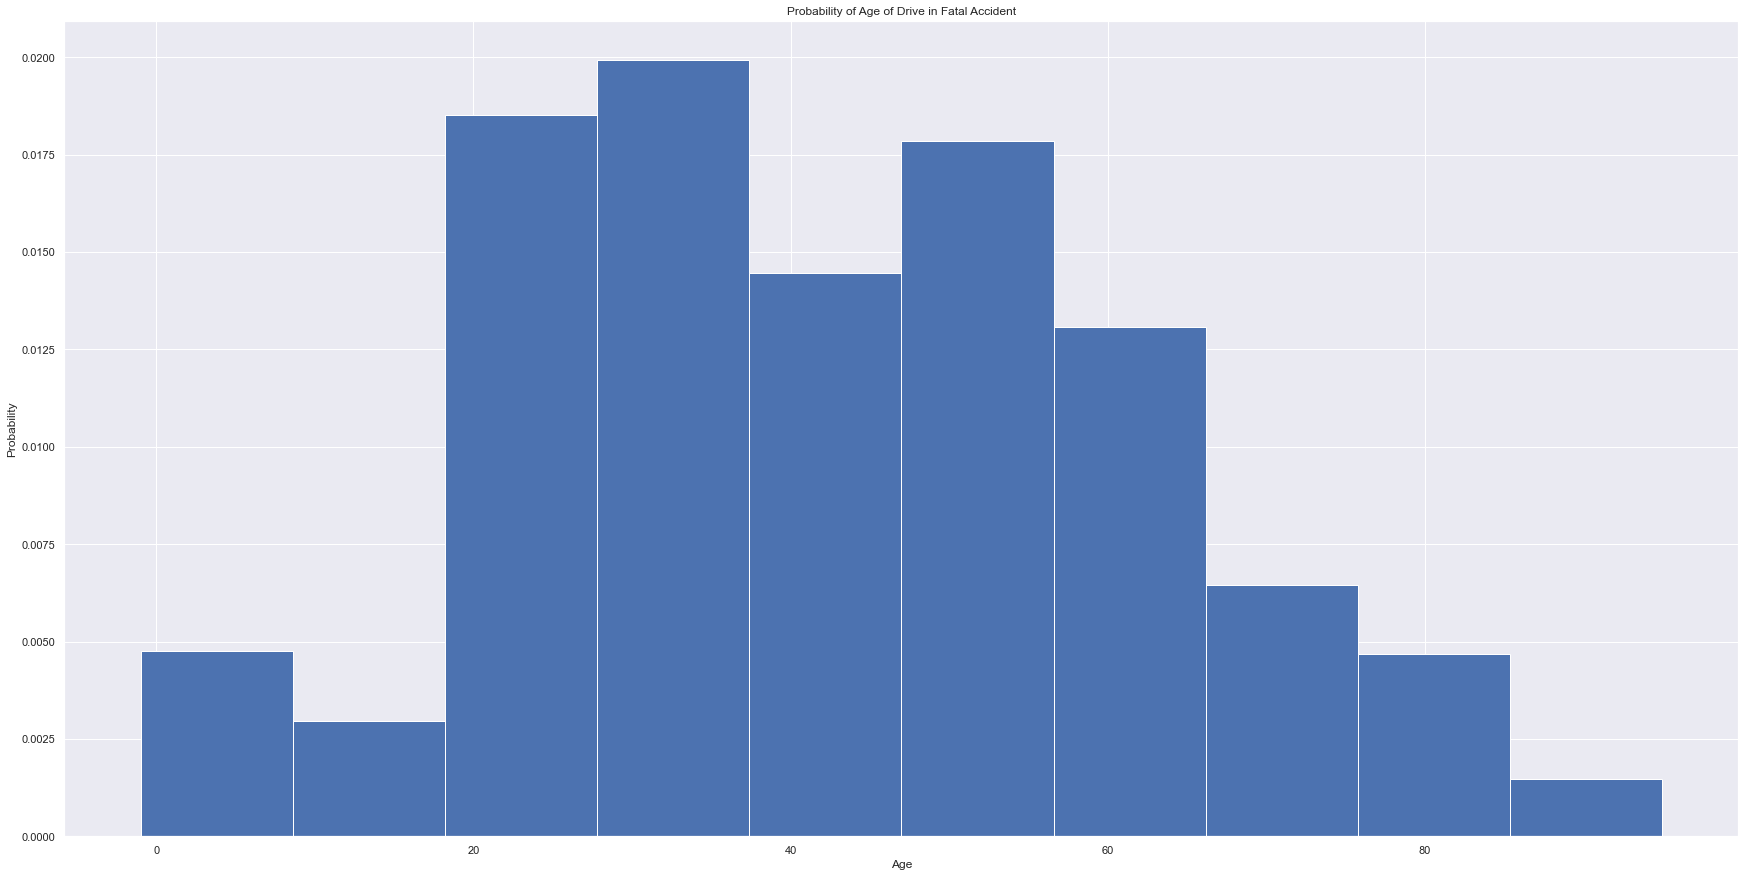

In [157]:

fatal_accidents.age_of_driver.hist(density = True)
plt.title('Probability of Age of Drive in Fatal Accident')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.savefig('hist_age')

In [87]:
fatal_accidents_sex = fatal_accidents[fatal_accidents['sex_of_driver'] != 3]
fatal_accidents_sex = fatal_accidents_sex[fatal_accidents_sex['age_of_driver'] != -1]
sex_key = {1:'Male', 2:'Female'}



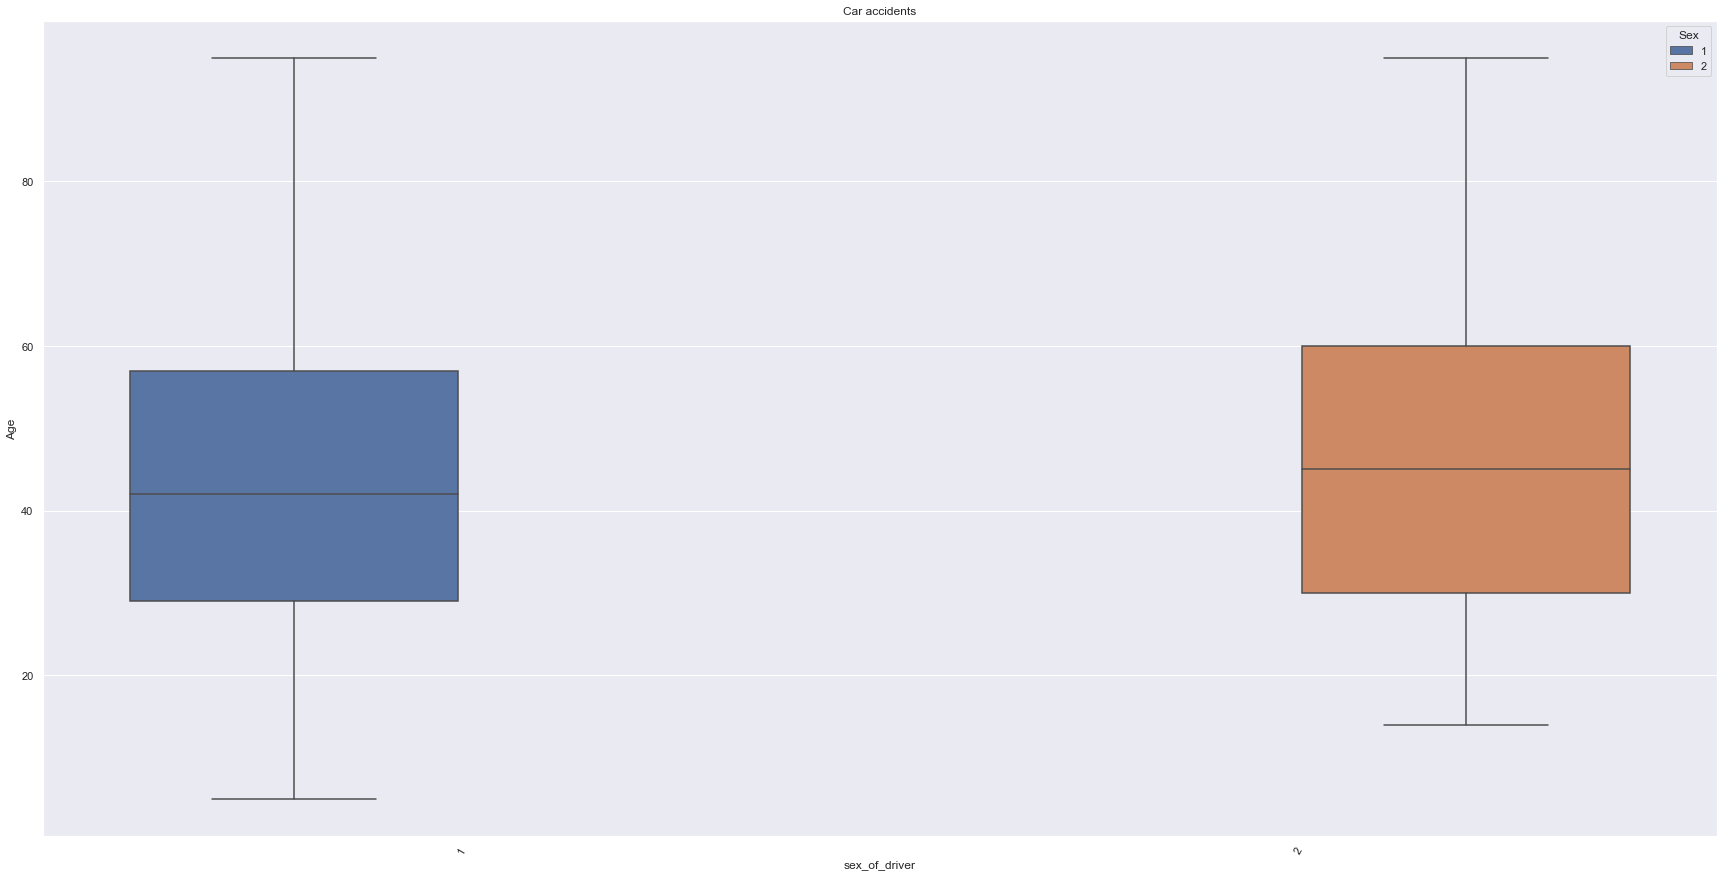

In [88]:
sns.boxplot(data = fatal_accidents_sex ,  x = "sex_of_driver", y = "age_of_driver",hue = 'sex_of_driver', whis = 10).set_title("Car accidents")
plt.xticks(rotation=60, ha='center')
plt.legend(loc=0, prop={'size': 12})

from matplotlib import rcParams

rcParams['figure.figsize'] = 12,8

plt.ylabel("Age")
plt.legend(title='Sex')

plt.show()

In [89]:
fatal_accidents_contact = fatal_accidents[fatal_accidents['first_point_of_impact'] != -1]
#fatal_accidents_contact = fatal_accidents_sex[fatal_accidents_sex['age_of_driver'] != -1]
#sex_key = {1:'Male', 2:'Female'}
fatal_accidents_contact

,accident_index_uk,accident_year_uk,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
19750,201601TD00001,2016,01TD00001,539790.0,179240.0,0.012331,51.494773,1,1,1,...,1,2,43,7,4500,2,2,-1,2,1
19751,201601TD00002,2016,01TD00002,533210.0,178740.0,-0.082587,51.491867,1,1,1,...,6,1,53,8,125,1,9,-1,4,1
19752,201601TD00004,2016,01TD00004,536540.0,182560.0,-0.033172,51.525401,1,1,2,...,6,1,49,8,998,1,2,-1,9,1
19753,201601TD00004,2016,01TD00004,536540.0,182560.0,-0.033172,51.525401,1,1,2,...,6,2,24,5,2000,1,12,-1,3,1
19754,201601TD00006,2016,01TD00006,542720.0,183600.0,0.056274,51.533220,1,1,1,...,6,1,24,5,2143,2,2,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879254,2.02099E+12,2020,991010035,113410.0,903322.0,-6.842655,57.926736,99,1,1,...,5,1,29,6,1461,2,1,NISSAN NV200,5,3
879274,2.02099E+12,2020,991010115,381609.0,654146.0,-2.294786,55.780278,99,1,2,...,5,1,48,8,1499,2,4,FORD FOCUS,9,3
879275,2.02099E+12,2020,991010115,381609.0,654146.0,-2.294786,55.780278,99,1,2,...,5,1,30,6,-1,-1,-1,-1,4,2
879310,2.02099E+12,2020,991010320,381719.0,665575.0,-2.293805,55.882969,99,1,2,...,6,2,29,6,1149,1,15,RENAULT CLIO,3,1


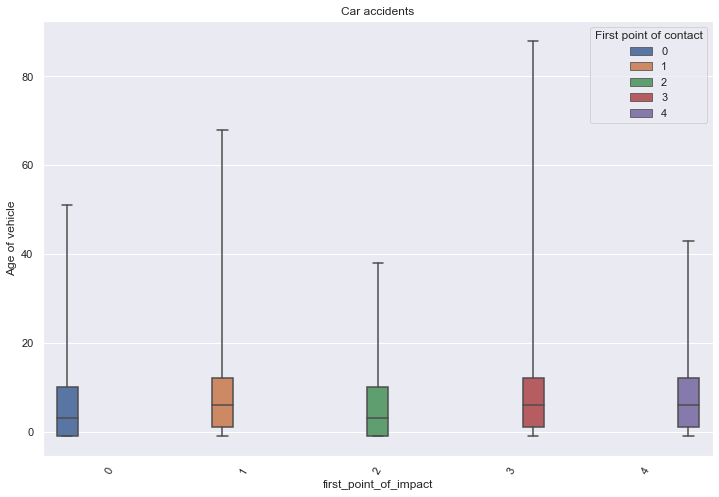

In [90]:
sns.boxplot(data = fatal_accidents_contact ,  x = "first_point_of_impact", y = "age_of_vehicle",hue = 'first_point_of_impact', whis = 10).set_title("Car accidents")
plt.xticks(rotation=60, ha='center')
plt.legend(loc=0, prop={'size': 12})

from matplotlib import rcParams

rcParams['figure.figsize'] = 12,8

plt.ylabel("Age of vehicle")
plt.legend(title='First point of contact')

plt.show()

In [91]:
df_guide_check = df_guide[df_guide['label'] == 'Data missing or out of range']

In [92]:
df_guide_check

,table,field name,code/format,label,note
1134,Accident,road_type,-1,Data missing or out of range,NaN
1136,Accident,speed_limit,-1,Data missing or out of range,NaN
1148,Accident,junction_detail,-1,Data missing or out of range,NaN
1154,Accident,junction_control,-1,Data missing or out of range,NaN
1169,Accident,pedestrian_crossing_human_control,-1,Data missing or out of range,NaN
1177,Accident,pedestrian_crossing_physical_facilities,-1,Data missing or out of range,NaN
1184,Accident,light_conditions,-1,Data missing or out of range,NaN
1194,Accident,weather_conditions,-1,Data missing or out of range,NaN
1202,Accident,road_surface_conditions,-1,Data missing or out of range,NaN
1212,Accident,special_conditions_at_site,-1,Data missing or out of range,NaN


In [93]:
#accident_andcar_df.columns
#count_miss = list(accident_andcar_df['generic_make_model'] == -1)
#count_miss

In [94]:
#sns.heatmap(accident_andcar_df.corr(), square=True, cmap='RdYlGn')

# Modelling

In [95]:
# 1. Select year

In [96]:
accident_andcar_df['accident_year_uk'].unique()

array([2016, 2017, 2018, 2019, 2020], dtype=int64)

In [97]:
accident_model_data = accident_andcar_df[accident_andcar_df['accident_year_uk'] == 2019].copy()
accident_model_data.shape

(161933, 66)

In [98]:
#drop unwanted columns
data_guide('junction_detail')

,table,field name,code/format,label,note
1138,Accident,junction_detail,0,Not at junction or within 20 metres,NaN
1139,Accident,junction_detail,1,Roundabout,NaN
1140,Accident,junction_detail,2,Mini-roundabout,NaN
1141,Accident,junction_detail,3,T or staggered junction,NaN
1142,Accident,junction_detail,5,Slip road,NaN
1143,Accident,junction_detail,6,Crossroads,NaN
1144,Accident,junction_detail,7,More than 4 arms (not roundabout),NaN
1145,Accident,junction_detail,8,Private drive or entrance,NaN
1146,Accident,junction_detail,9,Other junction,NaN
1147,Accident,junction_detail,99,unknown (self reported),NaN


In [99]:
accident_model_data = accident_model_data.drop(columns='police_force')

In [100]:
accident_model_data['sex_of_driver'].unique()

array([2, 1, 3], dtype=int64)

In [101]:
accident_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161933 entries, 104180 to 762374
Data columns (total 65 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index_uk                            161933 non-null  object        
 1   accident_year_uk                             161933 non-null  int64         
 2   accident_reference                           161933 non-null  object        
 3   location_easting_osgr                        161933 non-null  float64       
 4   location_northing_osgr                       161933 non-null  float64       
 5   longitude                                    161933 non-null  float64       
 6   latitude                                     161933 non-null  float64       
 7   accident_severity                            161933 non-null  int64         
 8   number_of_vehicles                           161933 non-nul

In [102]:
categorical_columns = [['day_of_week', 'time', 'first_road_class', 'road_type', 'speed_limit', 'junction_detail', 'junction_control',\
                        'second_road_class', 'pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities',\
                        'light_conditions', 'weather_conditions', 'road_surface_conditions','special_conditions_at_site',\
                        'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',\
                        'trunk_road_flag', 'date_time', 'hour', 'month', 'month_year',\
                        'vehicle_reference', 'vehicle_type', 'towing_and_articulation',\
                        'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane',\
                        'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway',\
                        'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver',\
                        'sex_of_driver' ,'age_band_of_driver', 'propulsion_code', 'driver_imd_decile', 'driver_home_area_type']]
                       
continuous_columns = ['age_of_driver', 'engine_capacity_cc', 'number_of_vehicles', 'number_of_casualties', 'age_of_vehicle']
    
X = accident_model_data['accident_severity']

In [103]:

accident_model_data.replace([99,-1],np.nan, inplace = True)
#accident_model_data.journey_purpose_of_driver.replace([99,-1], np.nan, inplace = True)
#accident_model_data.road_type.replace([99,-1], np.nan, inplace = True)
##accident_model_data.engine_capacity_cc.replace([99,-1], np.nan, inplace = True)
##accident_model_data.age_of_driver.replace([99,-1], np.nan, inplace = True)
#accident_model_data.sex_of_driver.replace([99,-1], np.nan, inplace = True)
#accident_model_data.weather_conditions.replace([99,-1], np.nan, inplace = True)
#accident_model_data.vehicle_manoeuvre.replace([99,-1], np.nan, inplace = True)
#accident_model_data.first_point_of_impact.replace([99,-1], np.nan, inplace = True)
#accident_model_data.age_of_vehicle.replace([99,-1], np.nan, inplace = True)
##accident_model_data.number_of_vehicles.replace([99,-1], np.nan, inplace = True)
##accident_model_data.number_of_casualties.replace([99,-1], np.nan, inplace = True)
accident_model_data_2 = accident_model_data.loc[:,['journey_purpose_of_driver','road_type','engine_capacity_cc','age_of_driver', 'sex_of_driver','weather_conditions','vehicle_manoeuvre', 'first_point_of_impact', 'age_of_vehicle', 'accident_severity']]
accident_model_data_cont = accident_model_data.loc[:,['age_of_driver', 'engine_capacity_cc', 'number_of_vehicles', 'number_of_casualties', 'age_of_vehicle', 'accident_severity' ]]
accident_model_data_2 = accident_model_data_2.dropna()

In [104]:
len(accident_model_data_cont)

161933

In [105]:
accident_model_data_cont.isna().sum()

age_of_driver           18210
engine_capacity_cc      37331
number_of_vehicles          0
number_of_casualties        0
age_of_vehicle          37092
accident_severity           0
dtype: int64

In [106]:
accident_model_data_cont.shape

(161933, 6)

In [107]:
accident_model_data_cont = accident_model_data_cont.dropna().copy()
accident_model_data_cont_feature= accident_model_data_cont.drop(['accident_severity'], axis = 1)
accident_model_data_cont_feature.columns

Index(['age_of_driver', 'engine_capacity_cc', 'number_of_vehicles',
       'number_of_casualties', 'age_of_vehicle'],
      dtype='object')

In [108]:
data_scaler = MinMaxScaler()

In [109]:
accident_model_data_cont_scaled = data_scaler.fit_transform(accident_model_data_cont_feature)
accident_model_data_cont_scaled = pd.DataFrame(accident_model_data_cont_scaled, columns = accident_model_data_cont_feature.columns)

accident_model_data_cont_scaled

,age_of_driver,engine_capacity_cc,number_of_vehicles,number_of_casualties,age_of_vehicle
0,0.416667,0.046599,0.0625,0.0,0.113636
1,0.354167,0.066580,0.0625,0.0,0.113636
2,0.447917,0.049935,0.0000,0.0,0.125000
3,0.489583,0.053271,0.0000,0.0,0.113636
4,0.218750,0.066613,0.0625,0.0,0.011364
...,...,...,...,...,...
115584,0.145833,0.073285,0.1875,0.0,0.045455
115585,0.281250,0.066580,0.0625,0.0,0.136364
115586,0.572917,0.098936,0.0625,0.0,0.056818
115587,0.750000,0.053237,0.0000,0.0,0.068182


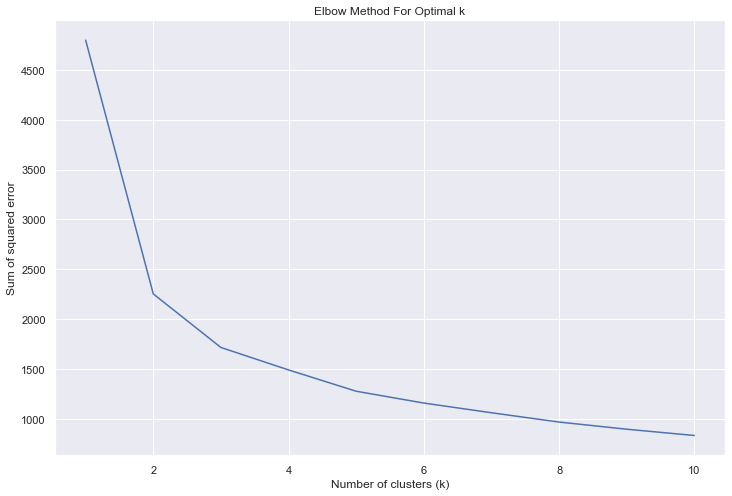

In [110]:
sse = []

for k in np.arange(1,11,1):
    km = KMeans(n_clusters=k)
    km.fit(accident_model_data_cont_scaled)
    sse.append(km.inertia_)
    
##Get the 'optimal' value for k
plt.plot(range(1,11), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method For Optimal k')
plt.show()

In [111]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(accident_model_data_cont_scaled)
    
len(y_kmeans)

115589

In [112]:
accident_model_data_cont_scaled["k-means_pred"] = y_kmeans
accident_model_data_cont_scaled["actual_values"] = accident_model_data_cont.accident_severity
pd.crosstab(accident_model_data_cont_scaled["actual_values"], accident_model_data_cont_scaled["k-means_pred"])


k-means_pred,0,1,2
actual_values,,,
2.0,5,4,1
3.0,2,3,1


In [113]:
#sns.pairplot(accident_model_data_cont_scaled, hue="k-means_pred")

## Model 2 - Logreg

In [114]:
## make the output binary 0/1

In [115]:
data_guide('accident_severity')

,table,field name,code/format,label,note
59,Accident,accident_severity,1,Fatal,NaN
60,Accident,accident_severity,2,Serious,NaN
61,Accident,accident_severity,3,Slight,NaN


In [116]:
# convert slight to 1 and Fatal & serious to 0

In [117]:
print(len(accident_model_data_2[accident_model_data_2['accident_severity'] == 1]))
print(len(accident_model_data_2[accident_model_data_2['accident_severity'] == 2]))
print(len(accident_model_data_2[accident_model_data_2['accident_severity'] == 3]))
print(accident_model_data_2.shape)

2098
23037
90110
(115245, 10)


In [118]:
accident_model_data_2.accident_severity.replace([1,2], 0, inplace = True)
accident_model_data_2.accident_severity.replace(3, 1, inplace = True)

In [119]:
print(len(accident_model_data_2[accident_model_data_2['accident_severity'] == 1]))
print(len(accident_model_data_2[accident_model_data_2['accident_severity'] == 2]))
print(len(accident_model_data_2[accident_model_data_2['accident_severity'] == 3]))
print(len(accident_model_data_2[accident_model_data_2['accident_severity'] == 0]))
print(accident_model_data_2.shape)

90110
0
0
25135
(115245, 10)


In [120]:
accident_severity_key = {0:'Fatal or serious', 1:'Slight'}


In [121]:
def plot_bar_chart(variable,predict):
    """Create a bar chart of the varable and the outcome data.
    
    Args:
        variable (str): Name of variable to plot on bar chart across x axis
        predict (str): Name of output variable to plot on bar chart
        
    Yields:
        Bar Chart
    """
    %matplotlib inline
    pd.crosstab(accident_model_data_2[variable],accident_model_data_2[predict],normalize = True).plot(kind='bar')
    plt.title('Accident severity for ' + variable)
    plt.xlabel(variable)
    plt.ylabel('Proportion of accident')
    plt.show

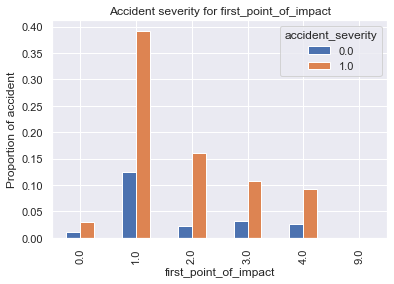

In [122]:
plot_bar_chart('first_point_of_impact', 'accident_severity')

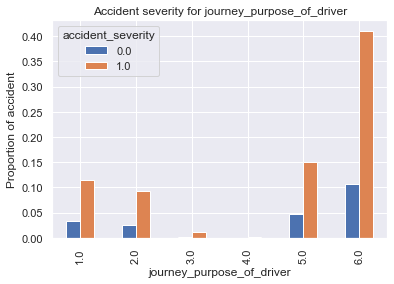

In [123]:
plot_bar_chart('journey_purpose_of_driver', 'accident_severity')

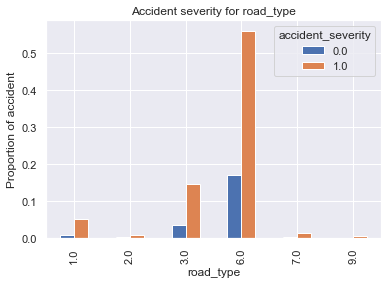

In [124]:
plot_bar_chart('road_type','accident_severity')

In [125]:
data_guide('road_type')

,table,field name,code/format,label,note
1127,Accident,road_type,1,Roundabout,NaN
1128,Accident,road_type,2,One way street,NaN
1129,Accident,road_type,3,Dual carriageway,NaN
1130,Accident,road_type,6,Single carriageway,NaN
1131,Accident,road_type,7,Slip road,NaN
1132,Accident,road_type,9,Unknown,NaN
1133,Accident,road_type,12,One way street/Slip road,NaN
1134,Accident,road_type,-1,Data missing or out of range,NaN


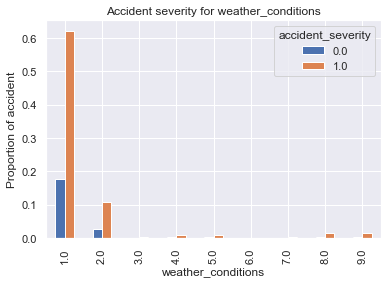

In [126]:
plot_bar_chart('weather_conditions','accident_severity')

In [127]:
data_guide('weather_conditions')

,table,field name,code/format,label,note
1185,Accident,weather_conditions,1,Fine no high winds,NaN
1186,Accident,weather_conditions,2,Raining no high winds,NaN
1187,Accident,weather_conditions,3,Snowing no high winds,NaN
1188,Accident,weather_conditions,4,Fine + high winds,NaN
1189,Accident,weather_conditions,5,Raining + high winds,NaN
1190,Accident,weather_conditions,6,Snowing + high winds,NaN
1191,Accident,weather_conditions,7,Fog or mist,NaN
1192,Accident,weather_conditions,8,Other,NaN
1193,Accident,weather_conditions,9,Unknown,NaN
1194,Accident,weather_conditions,-1,Data missing or out of range,NaN


In [128]:
len(accident_model_data_2[accident_model_data_2['weather_conditions'] == 1])

91998

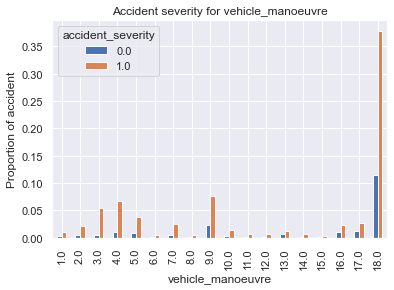

In [129]:
plot_bar_chart('vehicle_manoeuvre','accident_severity')

In [130]:
data_guide('vehicle_manoeuvre')

,table,field name,code/format,label,note
1278,Vehicle,vehicle_manoeuvre,1,Reversing,NaN
1279,Vehicle,vehicle_manoeuvre,2,Parked,NaN
1280,Vehicle,vehicle_manoeuvre,3,Waiting to go - held up,NaN
1281,Vehicle,vehicle_manoeuvre,4,Slowing or stopping,NaN
1282,Vehicle,vehicle_manoeuvre,5,Moving off,NaN
1283,Vehicle,vehicle_manoeuvre,6,U-turn,NaN
1284,Vehicle,vehicle_manoeuvre,7,Turning left,NaN
1285,Vehicle,vehicle_manoeuvre,8,Waiting to turn left,NaN
1286,Vehicle,vehicle_manoeuvre,9,Turning right,NaN
1287,Vehicle,vehicle_manoeuvre,10,Waiting to turn right,NaN


In [131]:
Model_columns = list(accident_model_data_2.columns)
Model_columns

['journey_purpose_of_driver',
 'road_type',
 'engine_capacity_cc',
 'age_of_driver',
 'sex_of_driver',
 'weather_conditions',
 'vehicle_manoeuvre',
 'first_point_of_impact',
 'age_of_vehicle',
 'accident_severity']

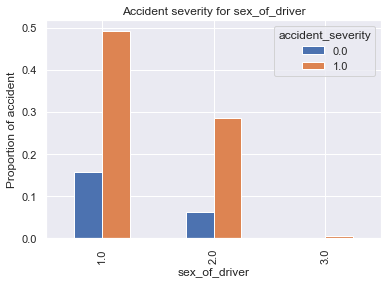

In [132]:
plot_bar_chart('sex_of_driver','accident_severity')

In [133]:
data_guide('sex_of_driver')

,table,field name,code/format,label,note
1408,Vehicle,sex_of_driver,1,Male,NaN
1409,Vehicle,sex_of_driver,2,Female,NaN
1410,Vehicle,sex_of_driver,3,Not known,NaN
1411,Vehicle,sex_of_driver,-1,Data missing or out of range,NaN


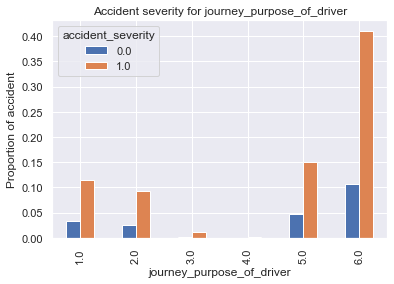

In [158]:
plot_bar_chart('journey_purpose_of_driver','accident_severity')

In [159]:
data_guide('journey_purpose_of_driver')

,table,field name,code/format,label,note
1400,Vehicle,journey_purpose_of_driver,1,Journey as part of work,NaN
1401,Vehicle,journey_purpose_of_driver,2,Commuting to/from work,NaN
1402,Vehicle,journey_purpose_of_driver,3,Taking pupil to/from school,NaN
1403,Vehicle,journey_purpose_of_driver,4,Pupil riding to/from school,NaN
1404,Vehicle,journey_purpose_of_driver,5,Other,NaN
1405,Vehicle,journey_purpose_of_driver,6,Not known,NaN
1406,Vehicle,journey_purpose_of_driver,15,Other/Not known,2005 specification only
1407,Vehicle,journey_purpose_of_driver,-1,Data missing or out of range,NaN


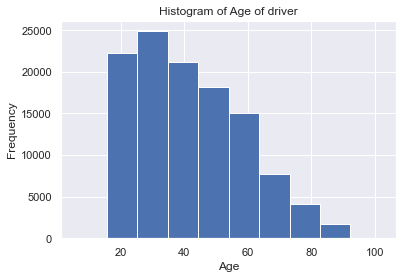

In [134]:
accident_model_data_2.age_of_driver.hist()
plt.title('Histogram of Age of driver')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [135]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.19041-SP0
Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
NumPy 1.20.1
SciPy 1.6.2
Scikit-Learn 1.1.1


In [136]:
#Dummy Variables

In [137]:
cat_var = ['journey_purpose_of_driver','road_type', 'sex_of_driver','weather_conditions','vehicle_manoeuvre', 'first_point_of_impact']

In [138]:
for var in cat_var:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(accident_model_data_2[var], prefix=var)
    accident_model_data_2a=accident_model_data_2.join(cat_list)
    accident_model_data_2=accident_model_data_2a

In [139]:
data_vars=accident_model_data_2.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_var]

In [140]:
accident_model_data_2_final=accident_model_data_2[to_keep]
accident_model_data_2_final.columns

Index(['engine_capacity_cc', 'age_of_driver', 'age_of_vehicle',
       'accident_severity', 'journey_purpose_of_driver_1.0',
       'journey_purpose_of_driver_2.0', 'journey_purpose_of_driver_3.0',
       'journey_purpose_of_driver_4.0', 'journey_purpose_of_driver_5.0',
       'journey_purpose_of_driver_6.0', 'road_type_1.0', 'road_type_2.0',
       'road_type_3.0', 'road_type_6.0', 'road_type_7.0', 'road_type_9.0',
       'sex_of_driver_1.0', 'sex_of_driver_2.0', 'sex_of_driver_3.0',
       'weather_conditions_1.0', 'weather_conditions_2.0',
       'weather_conditions_3.0', 'weather_conditions_4.0',
       'weather_conditions_5.0', 'weather_conditions_6.0',
       'weather_conditions_7.0', 'weather_conditions_8.0',
       'weather_conditions_9.0', 'vehicle_manoeuvre_1.0',
       'vehicle_manoeuvre_2.0', 'vehicle_manoeuvre_3.0',
       'vehicle_manoeuvre_4.0', 'vehicle_manoeuvre_5.0',
       'vehicle_manoeuvre_6.0', 'vehicle_manoeuvre_7.0',
       'vehicle_manoeuvre_8.0', 'vehicle_mano

In [141]:
X = accident_model_data_2_final.loc[:, accident_model_data_2_final.columns != 'accident_severity']
y = accident_model_data_2_final.loc[:, accident_model_data_2_final.columns == 'accident_severity']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [142]:
accident_model_data_2_final_vars=accident_model_data_2_final.columns.values.tolist()
y=['accident_severity']
X=[i for i in accident_model_data_2_final if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step = 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\obrienjo\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[False False False False  True  True False  True False  True False  True
 False  True  True False  True  True False  True False False False False
 False  True  True False False  True  True  True False  True  True False
  True False False  True False False  True  True False  True False  True
  True  True False]
[3 3 3 2 1 1 3 1 2 1 3 1 3 1 1 2 1 1 2 1 3 3 3 3 3 1 1 3 3 1 1 1 3 1 1 2 1
 3 3 1 3 3 1 1 3 1 2 1 1 1 3]


C:\Users\obrienjo\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:

rank = pd.DataFrame(rfe.support_,index=X,columns=['Rank']).reset_index()
rank
col_unsort = rank[rank['Rank'] == True]
cols = list(col_unsort['index'])
cols
len(cols)

25

In [144]:
X = accident_model_data_2_final[cols]
y = accident_model_data_2_final['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [145]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[    0  5089]
 [    0 17960]]


In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5089
         1.0       0.78      1.00      0.88     17960

    accuracy                           0.78     23049
   macro avg       0.39      0.50      0.44     23049
weighted avg       0.61      0.78      0.68     23049



C:\Users\obrienjo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\obrienjo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\obrienjo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

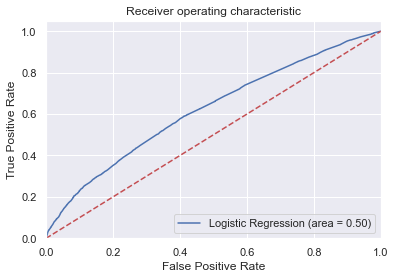

In [148]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()